### Modele de classification : Logistic Regression

### Importation des bibliothèques nécessaire

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

### Chargement du dataset

In [86]:
data = pd.read_csv("iris_dataset.csv")

In [87]:
data

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [88]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

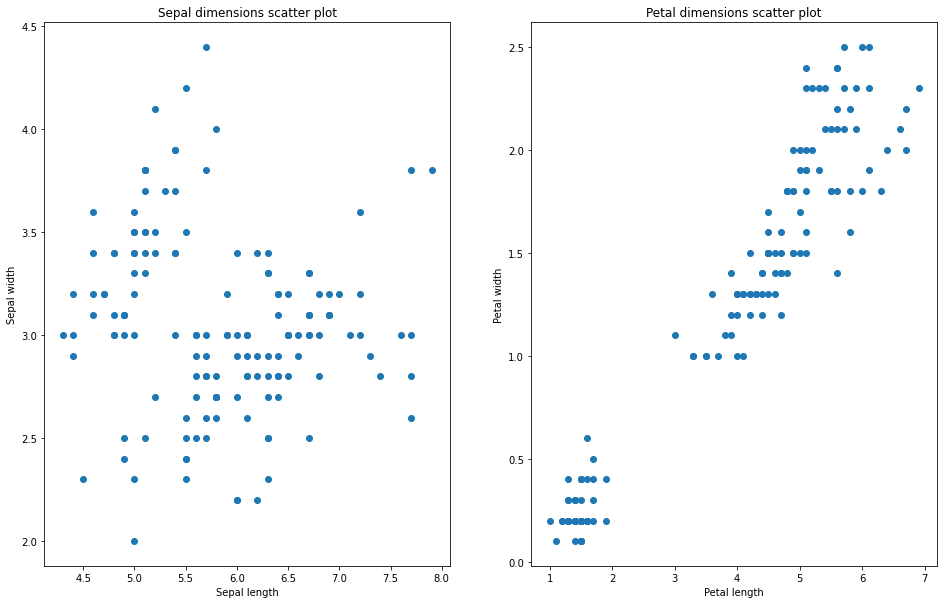

In [89]:
plt.figure(figsize=[16, 10])
plt.subplot(121)
plt.scatter(data.sepal_length, data.sepal_width)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Sepal dimensions scatter plot")
plt.subplot(122)
plt.scatter(data.petal_length, data.petal_width)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Petal dimensions scatter plot")
plt.draw()

La variable à expliquer ici est : species et les variables explicatives sont : sepal_length, sepal_width, petal_length, petal_width 

In [90]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Premières visualisations des données

In [91]:
plt.figure(figsize=[16, 10])
sns.countplot(x='species', data=data)
plt.xticks(np.arange(3), 'Iris-setosa Iris-versicolor Iris-virginica'.split())
plt.draw()

In [92]:
# Convertion de species en int
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [93]:
data

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

### 3. Découpage du data en 80% et 20%

In [94]:
dataWithoutSpacies = data.drop(['species'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(dataWithoutSpacies, data['species'], test_size=0.2)

In [95]:
print(x_train)
print(y_train)

     sepal_length  sepal_width  petal_length  petal_width
50            7.0          3.2           4.7          1.4
146           6.3          2.5           5.0          1.9
80            5.5          2.4           3.8          1.1
10            5.4          3.7           1.5          0.2
29            4.7          3.2           1.6          0.2
..            ...          ...           ...          ...
43            5.0          3.5           1.6          0.6
66            5.6          3.0           4.5          1.5
11            4.8          3.4           1.6          0.2
115           6.4          3.2           5.3          2.3
147           6.5          3.0           5.2          2.0

[120 rows x 4 columns]
50     1
146    2
80     1
10     0
29     0
      ..
43     0
66     1
11     0
115    2
147    2
Name: species, Length: 120, dtype: int64


### 4. Entrainement d'un algo de regression sur train

In [96]:
# Instantiate the model
logistic_regression = LogisticRegression()

In [97]:
# Fit the model using the training data
logistic_regression.fit(x_train, y_train)

/home/anisoft/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
# Use model to make predictions on test data
y_pred = logistic_regression.predict(x_test)

Lastly, we’ll use the classification_report() function to print the classification metrics for our model:

In [99]:
# Print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        12
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### Interprétation
- `Precision`: Sur toutes les espèces qui, selon le modèle, l'appatenance à une espèce seraient précis à 100%.
- `Recall`: De toutes prédiction d'appartenance à une espèce, le modèle a prédit correctement ce résultat à 100%.
- `F1-score`: Étant donné que cette valeur n'est pas très proche de 1, cela nous indique que le modèle fait un mauvais travail pour prédire si les espèces appartiennent à une race ou non. Elle est calculé comme suit:
\begin{align}
 2*\frac{Precision * Recall}{Precision + Recall}
\end{align}
- `Support`: Cette valeur nous indique combien d'espèce appartenaient à whaque classe dans l'ensemble de données de test. Nous pouvons voir qu'avec ce test 10 espèces sont des `Iris-setosa`, 12 sont des `Iris-versicolor` et 8 espèces sont des `Iris-virginica`.

In [100]:
#define metrics
'''y_pred_proba = logistic_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()'''

'y_pred_proba = logistic_regression.predict_proba(x_test)[::,1]\nfpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)\nauc = metrics.roc_auc_score(y_test, y_pred_proba)\n\n#create ROC curve\nplt.plot(fpr,tpr,label="AUC="+str(auc))\nplt.legend(loc=4)\nplt.show()'

 \begin{equation*} MSE = \frac{1}{n} \sum_{i=1}^n e_i^2 = \frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2 \end{equation*}